# Compare the Performance of ARIMA, LSTM and GRU Model in Predicting the Stock Price of Coke

## Group members : Quanquan Guo, Weiyi Yu,Xu Zhang.

# 1. Introduction
## 1.1 Introduction
Over the past years, there are large number of studies related to the stock researches. Predicting stock price is one of the most attractive topics, especially for investors. Since the stock data is a time series that contain the liner and non-linear components and we are inspired by deep/maching learing methods, we decided to apply the ARIMA and Long Short Term Memory(LSTM )model and Gate Recurrent Unit(GRU) in our research and compare their feasibility of predicting the stock price. 

In terms of selecting the stock, we prefer to choose the stock which is least affcted by the different kinds of external factors such as COVID-19 to help us to obtain a more accurate result. For instance, the share prices of oil companies (such as ExxonMobil) may fluctuate due to the Russian Ukrainian war. From the above analysis, we decided to choose the traditional and health company as our research object and Coke indeed is a good choice for us to explore further.In our research, we connect with the relevant economics field and apply three different models to predict the Coke stock openning price.

## 1.2 Background
Coke is one of the top company in the world, and it involves a large number of subbrands such as Fenda and Sprite. In addtion, these products are widely welcomed to the over 200 countries all over the world. Furthermore, COKE is as a tradational maufuactural company, which has the improved machine system and low R&D cost that is not as much as the begining period. Apart from that, since Coke has miliions of loyalty customers in different countries, it is easy for them to keep the stable revenue growth rate.(https://investors.coca-colacompany.com/) Therefore, there is no doubt that Coke is a suitable and worthable stock to do the prediction work.
## 1.3 Literature Review
Previous research showed that the some deep/machine learning methods to predict stock price. In terms of choosing methods, we are inspired by a study related to ARIMA, ANN, and LSTM about predicting stock price(Qihang Ma,2020). From this study, we are familar with the advantages and disadvantages of these three predicting methodologies during the predicting the stock price. It well shows that the comparsion among these machine learning methodoloies. After that we decided to use the Arima and LSTM models to predict Coke stock price(M K Ho et al 2021 J.Phys.:Conf.Ser.1998 012041). 

Furthermore, Umar Farouk Ibn Abdulrahman(2020) also offers us a new method that do a hybrid Arima-LSTM model for stock price prediction. At first, the researcher used the ARIMA model to get the train_set and then apply to the LSTM model to do the prediction. However, in our group project, there is difference between the capacity of data. It is a better way for us to seperate two models and compare their prediction result.

At last, LSTM is as the mostly frequently used method to estimate stock price, there is a paper focus in the appliction of the LSTM(Guangyu Ding,2019).We hope that the models in our research can be generlized to the real life prediction. 

# 2. Data
## 2.1 Data Source
We downloaded the relevant data of Coca Cola's stock market performance from April 30, 2002 to April 29, 2022 from the website of Yahoo Finance(https://finance.yahoo.com/quote/COKE?p=COKE).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import tensorflow as tf
import warnings
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM,Dropout,GRU  
from tensorflow.keras.optimizers import SGD 
from sklearn.metrics import mean_squared_error
from keras.models import load_model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller as ADF
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.api import qqplot
from statsmodels.graphics.tsaplots import plot_predict

In [2]:
warnings.filterwarnings("ignore")

In [4]:
#import data
dataset = pd.read_csv("COKE.csv",
                     index_col='Date',parse_dates=['Date'])              
#Using "Date" as index, and converting the "Date" format from a string to the desired date type

In [5]:
#exploring the data
dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-04-30,50.330002,50.330002,49.160000,49.160000,37.579525,9700
2002-05-01,49.110001,50.099998,49.110001,50.099998,38.298065,8300
2002-05-02,50.099998,50.410000,50.099998,50.240002,38.405106,3300
2002-05-03,50.240002,50.439999,49.750000,50.250000,38.412743,6400
2002-05-06,50.400002,50.400002,49.250000,49.389999,37.755337,3700


In [6]:
#check for missing values 
dataset.isnull().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

Since our research theme is to use the historical opening price data of Coke company to predict its future opening price, and we have obtained a complete Coke opening price data without missing value, so there is no need to merging/appending multiple datasets together. 
## 2.2 Summary Statistic

In [7]:
dataset.shape

(5037, 6)

In [8]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5037.000000,5037.000000,5037.000000,5037.000000,5037.000000,5037.000000
mean,124.265253,126.065412,122.428872,124.242625,118.716311,29440.520151
std,110.278255,112.269934,108.386290,110.274162,112.514543,35153.373358
min,32.680000,33.770000,31.410000,32.610001,28.067036,0.000000
25%,53.439999,54.049999,52.750000,53.439999,44.395271,12300.000000
50%,63.970001,64.480003,63.310001,63.970001,58.693283,21000.000000
75%,175.449997,177.630005,172.860001,175.089996,171.796326,35200.000000
max,622.190002,638.000000,608.869995,625.770020,625.502563,929500.000000


## 2.3 Data Transformation
1. To reduce the volatility and scale data to a given range, we log the data in ARIMA and normalize data in LSTM and GRU.
2. In ARIMA model, we do the first difference of the data to make the data stationary.
3. In order to forecast the stock price, we separte the dataset to train set and test set. Train set contains the data from 2002 to 2021, and test set contains data in 2022. We use training set to generate the model and use test set to test the accuracy of the model.The same train set and test set allow us to compare the prediction accuracy of the three models.

# 3. Modeling

## 3.1 ARIMA

In [4]:
# # Index the date
# data['Date'] = pd.to_datetime(data.Date,format = "%Y-%m-%d")
# data.index = data['Date']

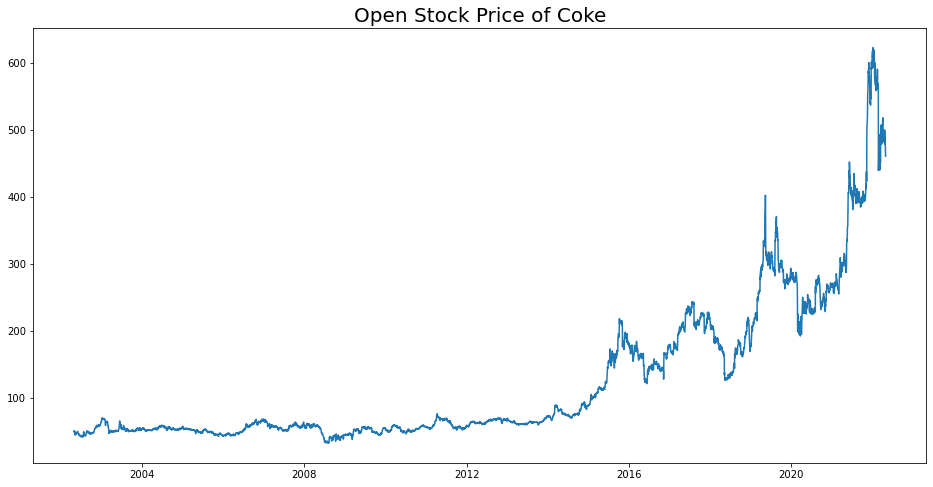

In [9]:
# Plot the data
plt.figure(figsize = (16,8))
plt.title("Open Stock Price of Coke", fontsize=20)
plt.plot(dataset['Open'])

### 3.1.1 Separte the data into training dataset and test dataset

In [10]:
train = dataset.loc[:'2021']
test = dataset.loc['2022']

In [11]:
train

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-04-30,50.330002,50.330002,49.160000,49.160000,37.579525,9700
2002-05-01,49.110001,50.099998,49.110001,50.099998,38.298065,8300
2002-05-02,50.099998,50.410000,50.099998,50.240002,38.405106,3300
2002-05-03,50.240002,50.439999,49.750000,50.250000,38.412743,6400
2002-05-06,50.400002,50.400002,49.250000,49.389999,37.755337,3700
...,...,...,...,...,...,...
2021-12-27,590.909973,602.140015,585.369995,599.650024,599.393738,21600
2021-12-28,605.000000,619.150024,605.000000,612.020020,611.758423,23900
2021-12-29,611.349976,625.000000,602.020020,616.000000,615.736694,19000


In [12]:
test

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,616.349976,618.989990,599.109985,616.840027,616.576355,23100
2022-01-04,618.969971,621.000000,595.770020,608.419983,608.159912,23800
2022-01-05,604.109985,619.099976,604.000000,606.049988,605.790955,21700
2022-01-06,612.000000,628.840027,608.869995,625.770020,625.502563,26600
2022-01-07,622.190002,622.190002,600.000000,600.000000,599.743530,31100
...,...,...,...,...,...,...
2022-04-25,478.380005,489.000000,470.079987,485.140015,485.140015,40900
2022-04-26,485.410004,499.959991,470.790009,473.450012,473.450012,36900
2022-04-27,476.760010,478.850006,461.589996,462.000000,462.000000,35600


### 3.1.2 Log the data

<AxesSubplot:title={'center':'Log Open Stock Price of Coke (Training set)'}, xlabel='Date'>

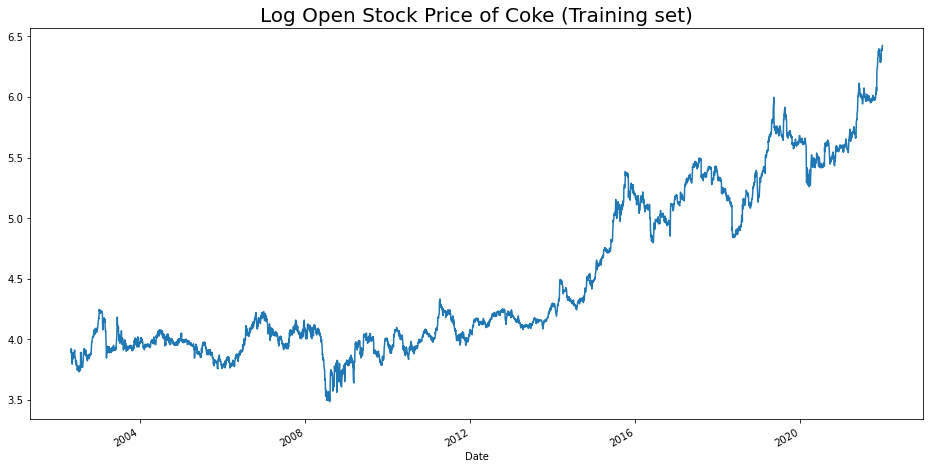

In [13]:
# Log the training set data and test set data
train_log = np.log(train['Open'])
test_log = np.log(test['Open'])
# Plot the log data
plt.figure(figsize = (16,8))
plt.title("Log Open Stock Price of Coke (Training set)", fontsize=20)
train_log.plot()## 3.1.3 Log the data

### 3.1.3 Test the stationary

### a) ACF/PACF

<Figure size 432x288 with 0 Axes>

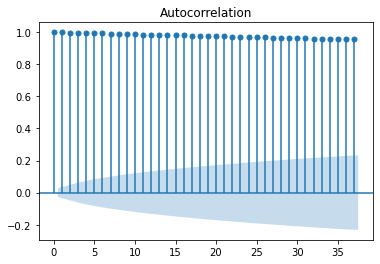

<Figure size 432x288 with 0 Axes>

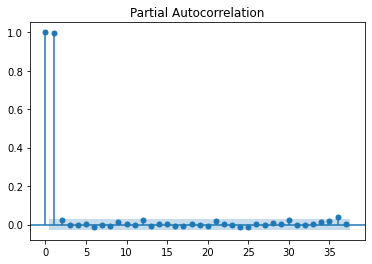

In [14]:
# ACF/PACF of the original log data
plt.figure() 
plot_acf(train_log)
plt.show()
plt.figure()
plot_pacf(train_log, method='ywm')
plt.show()

### b) ADF test

In [15]:
# Use ADF test to test if the original data is stationary
print(u'ADF test result of original training data:', ADF(train_log))

ADF test result of original training data: (0.7666230175850758, 0.9910778434159846, 1, 4953, {'1%': -3.431670955440146, '5%': -2.862123718245022, '10%': -2.567080714139114}, -24077.573515082076)


### Here the result is:

adf、pvalue、usedlag、nobs、critical values、icbest、regresults、resstore

p value: 0.9910778434159848 > 0.05, means the original data is non-stationary.

### 3.1.4 1st difference of log data

In [16]:
# Difference the data and remove null values
# This step is to remove the trend and make data stationary
diff = train_log.diff(1).dropna() 
diff

Date
2002-05-01   -0.024539
2002-05-02    0.019958
2002-05-03    0.002791
2002-05-06    0.003180
2002-05-07   -0.023488
                ...   
2021-12-27   -0.016998
2021-12-28    0.023565
2021-12-29    0.010441
2021-12-30    0.004293
2021-12-31    0.004145
Name: Open, Length: 4954, dtype: float64

### a) Test the stationarity

In [17]:
# Use ADF test to test if the 1st difference data is stationary
print(u'ADF test result of original data:', ADF(diff))

ADF test result of original data: (-75.85558452708824, 0.0, 0, 4953, {'1%': -3.431670955440146, '5%': -2.862123718245022, '10%': -2.567080714139114}, -24073.667788868734)


Here the result is:

adf、pvalue、usedlag、nobs、critical values、icbest、regresults、resstore

p value: 0.0 < 0.05, means the 1st difference data is stationary.

### b) Ljung-Box test
Test if the 1st difference data is white noise

In [18]:
from statsmodels.stats.diagnostic import acorr_ljungbox as lb_test
lb_test(diff, lags=40, boxpierce=False)
# lb_stat
# lb_pvalue

(array([27.79189231, 29.03850564, 29.53937362, 29.62266642, 30.28386857,
        32.76346021, 33.73037473, 34.39860564, 35.80040674, 35.82114805,
        38.01579699, 38.40211468, 40.80092492, 40.83412391, 42.32786111,
        43.02333325, 43.53114405, 45.46214312, 48.47026098, 54.51258957,
        55.01769466, 55.0787085 , 55.07871018, 63.8587202 , 67.11036483,
        68.97397028, 68.97442308, 69.14940445, 74.35779736, 75.56485898,
        76.42131345, 76.82102407, 77.20659113, 77.68808725, 77.86946044,
        78.05455479, 78.52772638, 78.71985145, 79.27689089, 79.47105414]),
 array([1.35091053e-07, 4.94730424e-07, 1.72491048e-06, 5.84101348e-06,
        1.29673590e-05, 1.16438369e-05, 1.93452680e-05, 3.43961172e-05,
        4.30131804e-05, 9.03452491e-05, 7.77575326e-05, 1.31958399e-04,
        1.02635502e-04, 1.88880789e-04, 2.00070000e-04, 2.77198117e-04,
        4.01446053e-04, 3.55249119e-04, 2.19300752e-04, 4.85436657e-05,
        7.02739862e-05, 1.15749265e-04, 1.90131719e-04

It shows that all the p values are less than 0.05.

So the 1st difference data is not the white noise, and we can continue the analysis.

### c) Plot the 1st difference data

<AxesSubplot:title={'center':'1st Difference of Log Open Stock Price of Coke'}, xlabel='Date'>

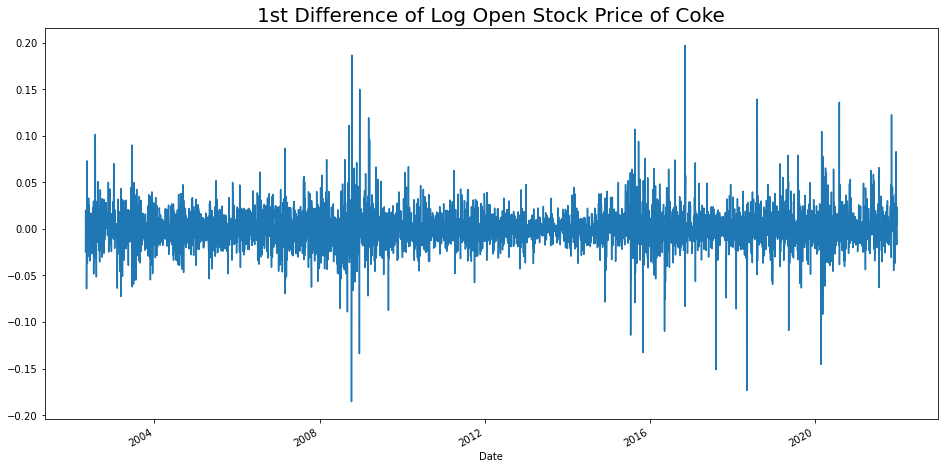

In [19]:
plt.figure(figsize = (16,8))
plt.title("1st Difference of Log Open Stock Price of Coke", fontsize=20)
diff.plot()

From the figure above, we can see the mean of 1st difference data is constant

### d) ACF/PACF

<Figure size 432x288 with 0 Axes>

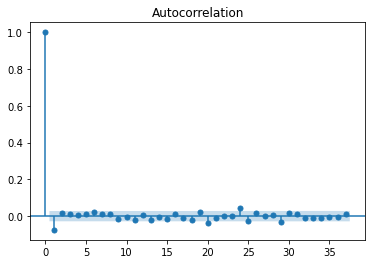

<Figure size 432x288 with 0 Axes>

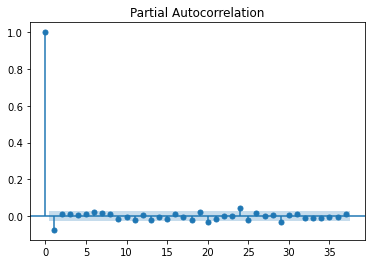

In [20]:
# ACF/PACF of 1st difference data
plt.figure() 
plot_acf(diff)
plt.show()
plt.figure()
plot_pacf(diff, method='ywm')
plt.show()

From ACF&PACF, we can find p_max is 2, q_max is 2.

### 3.1.5 Fit the model

### a) Use AIC to find the optimal model

In [22]:
# Find the optimal model
from pmdarima import auto_arima
mod = auto_arima(train_log,start_p=0,d=1,start_q=0,max_p=2,max_d=2,max_q=2)
mod.fit(train_log)

ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True)

### b) Model

In [23]:
# Define the model
model = ARIMA(train_log, order=(1, 1, 0))
result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                 4955
Model:                 ARIMA(1, 1, 0)   Log Likelihood               12112.378
Date:                Fri, 06 May 2022   AIC                         -24220.756
Time:                        02:05:38   BIC                         -24207.740
Sample:                             0   HQIC                        -24216.192
                               - 4955                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0743      0.007    -10.560      0.000      -0.088      -0.060
sigma2         0.0004   3.68e-06    119.754      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.00   Jarque-

### 3.1.6 Test the residuals

### a) Plot the residuals

<AxesSubplot:xlabel='Date'>

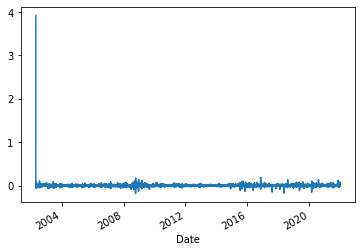

In [24]:
resid = result.resid
# Plot the residuals
plt.figure()
resid.plot()

### b) ACF

<Figure size 432x288 with 0 Axes>

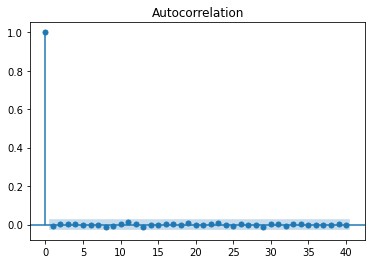

In [25]:
# ACF of the residual
plt.figure()
sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40)
plt.show()

### c) QQplot

QQ plot


<Figure size 432x288 with 0 Axes>

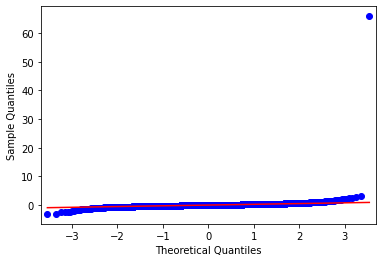

In [26]:
# QQplot
fig = plt.figure()
print("QQ plot")
fig = qqplot(resid, line='q', fit=True)
plt.show()

ACF and QQplot show that the residuals of the model is white noise

### d) Ljung-Box test

In [27]:
# Ljung-Box test
lb_test(resid, lags=40, boxpierce=False)
# lb_stat
# lb_pvalue

(array([0.15487148, 0.29542886, 0.32128706, 0.33036756, 0.39538729,
        0.39552088, 0.40825707, 1.2891652 , 1.44839047, 1.50139522,
        2.46250302, 2.46339329, 3.08611844, 3.0861265 , 3.18695319,
        3.19272471, 3.20010627, 3.24866208, 3.72242931, 3.73407623,
        3.77411776, 3.77492185, 3.9501861 , 3.95965455, 4.23978407,
        4.24352492, 4.26072528, 4.26076277, 4.94209772, 4.95530384,
        4.95737791, 5.16955119, 5.18886089, 5.22084937, 5.24110559,
        5.26353403, 5.29409641, 5.41406932, 5.42805488, 5.47565175]),
 array([0.6939228 , 0.86267743, 0.95597648, 0.98777044, 0.99545569,
        0.99888782, 0.99971793, 0.99568035, 0.99751183, 0.99893097,
        0.99609752, 0.99829166, 0.99760566, 0.99891188, 0.99941615,
        0.99974345, 0.99988981, 0.99994913, 0.99993925, 0.99997368,
        0.99998805, 0.99999514, 0.99999699, 0.99999877, 0.999999  ,
        0.9999996 , 0.99999984, 0.99999994, 0.99999985, 0.99999994,
        0.99999998, 0.99999998, 0.99999999, 1.

All the p values are bigger than 0.05.

It shows that the residuals of the model is white noise.

So we do not need to find another model.

### 3.1.7 Forecasting

### a) Forecasting the log data in the test set

In [28]:
forecast_log = mod.predict(n_periods = 82)
forecast_log = pd.DataFrame(forecast_log,index = test_log.index,columns=['Prediction'])

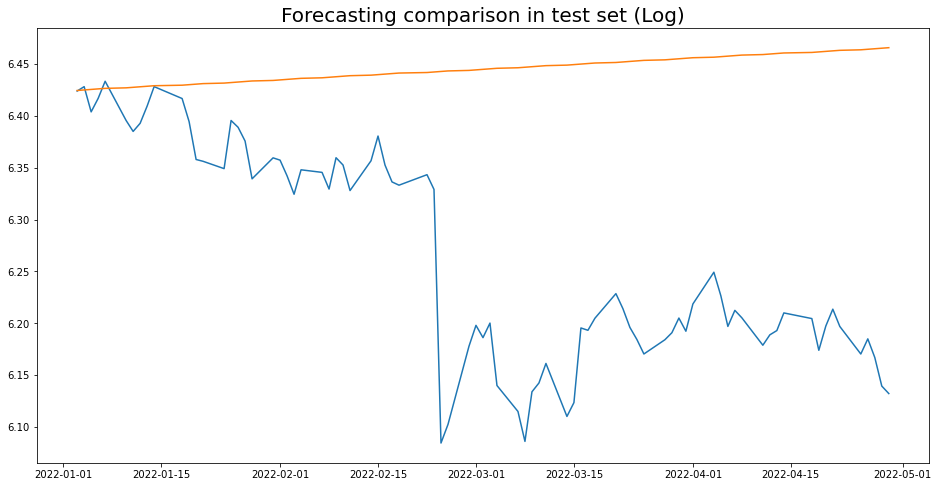

In [29]:
# Forecasting data in test dataset
plt.figure(figsize = (16,8))
plt.title("Forecasting comparison in test set (Log)", fontsize=20)
plt.plot(test_log)
plt.plot(forecast_log['Prediction'])

### MSE

In [30]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_log, forecast_log['Prediction'])
mse

0.04583937236443556

### RMSE

In [31]:
rmse = np.sqrt(mse)
rmse

0.21410131331786725

### b) Remove the log and forecasting the original data

In [32]:
# Forecasting the data and remove the log (back to original data)
forecast = np.exp(mod.predict(n_periods = 82))
forecast = pd.DataFrame(forecast,index = test['Open'].index,columns=['Prediction'])

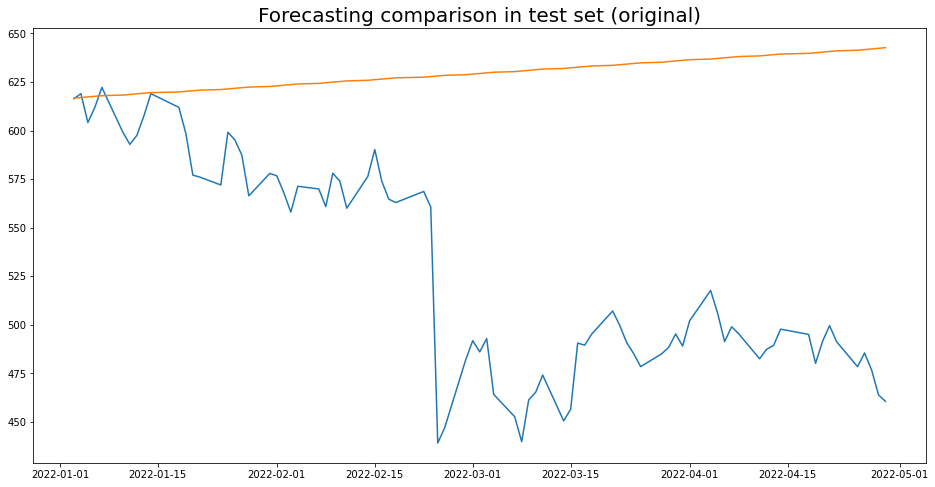

In [33]:
# Forecasting data in test dataset
plt.figure(figsize = (16,8))
plt.title("Forecasting comparison in test set (original)", fontsize=20)
plt.plot(test['Open'])
plt.plot(forecast['Prediction'])

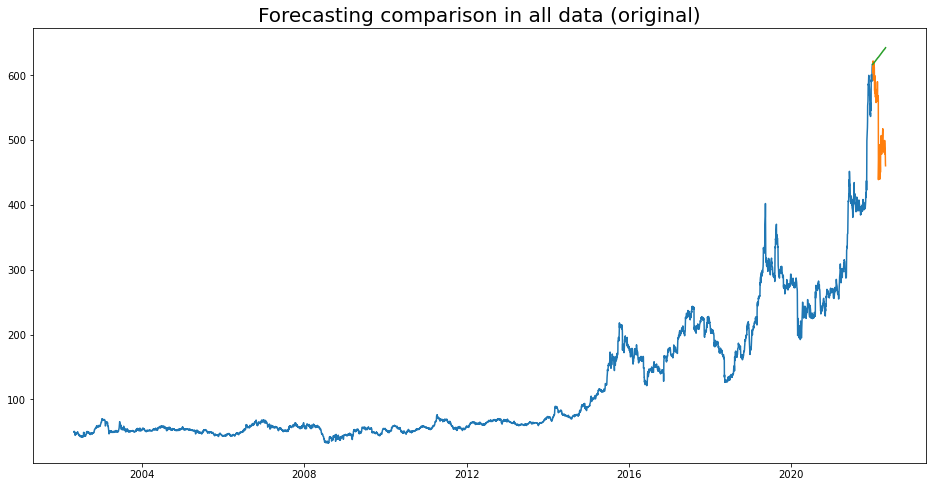

In [34]:
# Forecasting data in all dataset
plt.figure(figsize = (16,8))
plt.title("Forecasting comparison in all data (original)", fontsize=20)
plt.plot(train['Open'])
plt.plot(test['Open'])
plt.plot(forecast['Prediction'])

### MSE

In [35]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test['Open'], forecast['Prediction'])
mse

14117.05341309031

### RMSE

In [36]:
rmse = np.sqrt(mse)
rmse

118.81520699426615

We can see that the MSE and RMSE of orignal data is super high that it seems the model can not predict the future price well.

mIn contrast, the MSE and RMSE of log data is extremely low because log reduces the range of data.

## 3.2 LSTM

### 3.2.1 Divide the dataset into two parts(train set and test set)

In [37]:
train_set = dataset[:'2021'].iloc[:,[0]].values # Using the opening price data from 4/30/2002 to 12/31/2021 as the train set
test_set = dataset['2022':].iloc[:,[0]].values  # Using the opening price data from 1/3/2022 to 4/29/2022 as the test set

In [38]:
train_set.shape

(4955, 1)

In [39]:
test_set.shape

(82, 1)

In [40]:
def plot_predictions(test_result,predict_result):
    '''
    test_result：true value
    predict_result：predicted value
    '''
    plt.plot(test_result,color='red',label='Coke True Stock Price')
    plt.plot(predict_result,color='blue',label='Coke Predicted Stock Price')
    plt.title('Coke True Stock Price')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend() 
    plt.show()
    

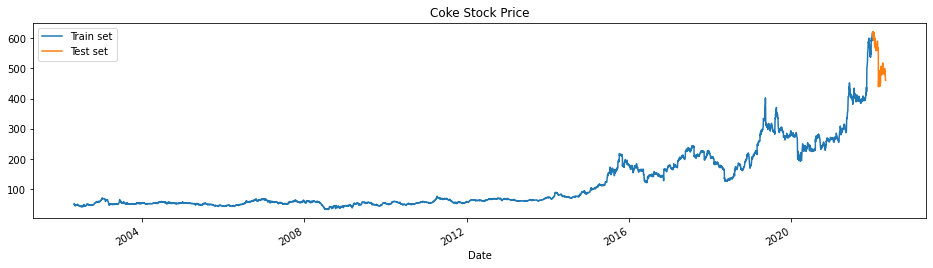

In [41]:
dataset['Open'][:'2021'].plot(figsize=(16,4),legend=True) 
dataset['Open']['2022':].plot(figsize=(16,4),legend=True)
plt.title('Coke Stock Price')
plt.legend(['Train set','Test set'])
plt.show()

In [42]:
#scaling data to a given range
sc = MinMaxScaler(feature_range=[0,1])
train_set_scaled = sc.fit_transform(train_set)

In [43]:
#Using 60 historical data as one sample to predict one output(the next opening price)
X_train = []
Y_train = []
for i in range(60,4955):
    X_train.append(train_set_scaled[i-60:i,0])
    Y_train.append(train_set_scaled[i,0])

X_train,Y_train = np.array(X_train),np.array(Y_train)  

In [44]:
X_train.shape  #4390 samples

(4895, 60)

In [45]:
X_train[0] 

array([0.03023037, 0.02814079, 0.02983643, 0.03007622, 0.03035026,
       0.02834632, 0.02745568, 0.02620536, 0.02108418, 0.02024492,
       0.02168365, 0.02755845, 0.02704462, 0.02403014, 0.02452685,
       0.02367046, 0.02372184, 0.024681  , 0.0243727 , 0.02706174,
       0.02791813, 0.02742142, 0.02752419, 0.02964803, 0.02711312,
       0.0255545 , 0.02522908, 0.02452685, 0.02449259, 0.02176929,
       0.02195769, 0.02161514, 0.01981673, 0.02110131, 0.02240301,
       0.02195769, 0.02154663, 0.02038195, 0.01904599, 0.01933716,
       0.01853216, 0.01656247, 0.01774428, 0.01878908, 0.0188062 ,
       0.01767577, 0.01663098, 0.01647683, 0.01817248, 0.01690502,
       0.01909737, 0.01555194, 0.0168879 , 0.01594588, 0.01680226,
       0.01856641, 0.0193029 , 0.01937142, 0.01767577, 0.01640832])

In [46]:
# structure of LSTM :(samples, sequence, length,features)
# reshape:train_set(4390,60)---->(4390,60,1)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [47]:
X_train.shape

(4895, 60, 1)

### 3.2.2 Fit the Model
Please don't run this part.

In [18]:
model = Sequential()  
#LSTM first layer
model.add(LSTM(128,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))  

#LSTM second layer
model.add(LSTM(128,return_sequences=True))
model.add(Dropout(0.2))

#LSTM third layer
model.add(LSTM(128))
model.add(Dropout(0.2))

#Dense layer
model.add(Dense(units=1))

In [19]:

model.compile(optimizer='rmsprop',loss='mse')   


model.fit(X_train,Y_train,epochs=25,batch_size=32) 

Epoch 1/25
153/153 [==============================] - 29s 161ms/step - loss: 0.0036
Epoch 2/25
153/153 [==============================] - 25s 164ms/step - loss: 0.0014
Epoch 3/25
153/153 [==============================] - 24s 156ms/step - loss: 0.0010
Epoch 4/25
153/153 [==============================] - 23s 152ms/step - loss: 8.9307e-04
Epoch 5/25
153/153 [==============================] - 23s 149ms/step - loss: 8.2694e-04
Epoch 6/25
153/153 [==============================] - 24s 155ms/step - loss: 7.6671e-04
Epoch 7/25
153/153 [==============================] - 23s 150ms/step - loss: 6.0607e-04
Epoch 8/25
153/153 [==============================] - 24s 158ms/step - loss: 6.3782e-04
Epoch 9/25
153/153 [==============================] - 29s 187ms/step - loss: 5.5826e-04
Epoch 10/25
153/153 [==============================] - 28s 186ms/step - loss: 6.2717e-04
Epoch 11/25
153/153 [==============================] - 28s 181ms/step - loss: 5.6258e-04
Epoch 12/25
153/153 [=====================

In [20]:
#save model to a single file
model.save('lstm_model.h5')

### 3.2.3 Load Model and Make Prediction
Please download the file lstm_model.h5 first.

In [48]:
lstm_model =load_model('lstm_model.h5')

In [49]:
dataset_total = pd.concat((dataset['Open'][:'2021'],dataset['Open']['2022':]),axis=0)

inputs = dataset_total[len(dataset_total)-len(test_set)-60:].values

In [50]:
inputs

array([403.019989, 408.399994, 405.73999 , 399.220001, 400.200012,
       404.      , 402.380005, 395.5     , 392.779999, 394.570007,
       395.950012, 394.299988, 394.429993, 397.480011, 395.799988,
       394.470001, 396.829987, 404.98999 , 415.      , 411.359985,
       419.309998, 416.98999 , 437.339996, 424.100006, 422.899994,
       477.959991, 499.      , 510.799988, 515.      , 519.780029,
       528.809998, 553.      , 560.109985, 580.      , 586.48999 ,
       584.880005, 600.      , 573.799988, 571.150024, 569.23999 ,
       585.119995, 578.25    , 567.      , 562.      , 559.72998 ,
       539.359985, 540.52002 , 541.700012, 536.530029, 557.099976,
       552.98999 , 545.820007, 592.929993, 590.150024, 601.039978,
       590.909973, 605.      , 611.349976, 613.97998 , 616.530029,
       616.349976, 618.969971, 604.109985, 612.      , 622.190002,
       599.099976, 592.830017, 597.47998 , 607.469971, 618.97998 ,
       611.929993, 598.450012, 577.01001 , 576.      , 571.950

In [51]:
#normalization
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)  

In [52]:
inputs.shape

(142, 1)

In [53]:
#getting test set X_test
X_test = []
for i in range(60,142):
    X_test.append(inputs[i-60:i,0])
    
X_test = np.array(X_test)   

X_test.shape

(82, 60)

In [54]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [55]:
X_test.shape

(82, 60, 1)

In [56]:
predict_test = lstm_model.predict(X_test) 

In [57]:
predict_test

array([[0.9621474 ],
       [0.9639286 ],
       [0.9665224 ],
       [0.95472425],
       [0.95455354],
       [0.96452457],
       [0.95051146],
       [0.93593365],
       [0.9325298 ],
       [0.94136626],
       [0.95732194],
       [0.9592939 ],
       [0.9466962 ],
       [0.9202364 ],
       [0.90518624],
       [0.89610785],
       [0.9167683 ],
       [0.9267641 ],
       [0.92350394],
       [0.90152293],
       [0.89870805],
       [0.89861584],
       [0.89203745],
       [0.87940276],
       [0.884089  ],
       [0.88729495],
       [0.88103616],
       [0.89173275],
       [0.89514786],
       [0.8840219 ],
       [0.89091855],
       [0.9085267 ],
       [0.90410286],
       [0.89134103],
       [0.88223034],
       [0.88350517],
       [0.87871045],
       [0.77392167],
       [0.71495384],
       [0.7193638 ],
       [0.74245507],
       [0.7514817 ],
       [0.7591718 ],
       [0.7370245 ],
       [0.7122291 ],
       [0.68836695],
       [0.69556075],
       [0.707

In [58]:
predict_test.shape

(82, 1)

In [59]:
predict_stock_price = sc.inverse_transform(predict_test) #getting predicted price from normalized data 

In [60]:
predict_stock_price

array([[594.42975],
       [595.4697 ],
       [596.98413],
       [590.09576],
       [589.9961 ],
       [595.8177 ],
       [587.63617],
       [579.1249 ],
       [577.1376 ],
       [582.29675],
       [591.6124 ],
       [592.76373],
       [585.40857],
       [569.9601 ],
       [561.17303],
       [555.8726 ],
       [567.93524],
       [573.77124],
       [571.8678 ],
       [559.0342 ],
       [557.39075],
       [557.3369 ],
       [553.4961 ],
       [546.1193 ],
       [548.8554 ],
       [550.7272 ],
       [547.073  ],
       [553.3182 ],
       [555.31213],
       [548.8162 ],
       [552.84283],
       [563.12335],
       [560.54047],
       [553.0895 ],
       [547.7702 ],
       [548.5145 ],
       [545.71515],
       [484.5342 ],
       [450.10583],
       [452.6806 ],
       [466.1624 ],
       [471.43262],
       [475.9225 ],
       [462.99176],
       [448.51498],
       [434.58307],
       [438.78317],
       [445.9823 ],
       [454.7532 ],
       [447.12033],


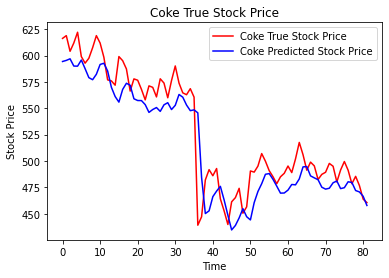

In [61]:
plot_predictions(test_set,predict_stock_price)

### MSE and RMSE

In [62]:
mse = mean_squared_error(test_set,predict_stock_price)
rmse = np.sqrt(mse)
print(rmse)

23.29578400154224


## 3.3 GRU

We use the same train set and test set in GRU as in LSTM.

### 3.3.1 Fit the Model
Please don't run this part.

In [63]:
model_gru = Sequential()

In [64]:
model_gru.add(GRU(50,return_sequences=True, input_shape=(X_train.shape[1],1),activation='tanh'))

In [65]:
model_gru.add(Dropout(0.2))

In [66]:
model_gru.add(GRU(50,activation='tanh'))

In [67]:
model_gru.add(Dropout(0.2))

In [42]:
model_gru.add(Dense(1))

In [43]:
model_gru.compile(optimizer=SGD(lr=0.01,decay=1e-7, momentum=0.9), loss='mse')

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [44]:
model_gru.fit(X_train, Y_train, epochs=25, batch_size=32)                                                                                                                                                                                                                                                          

Epoch 1/25
153/153 [==============================] - 10s 47ms/step - loss: 0.0112
Epoch 2/25
153/153 [==============================] - 7s 45ms/step - loss: 9.9650e-04
Epoch 3/25
153/153 [==============================] - 7s 45ms/step - loss: 7.9889e-04
Epoch 4/25
153/153 [==============================] - 7s 48ms/step - loss: 6.6408e-04: 0s - los
Epoch 5/25
153/153 [==============================] - 7s 45ms/step - loss: 6.7035e-04
Epoch 6/25
153/153 [==============================] - 7s 47ms/step - loss: 6.3101e-04
Epoch 7/25
153/153 [==============================] - 7s 45ms/step - loss: 6.1874e-04
Epoch 8/25
153/153 [==============================] - 7s 48ms/step - loss: 5.9307e-04
Epoch 9/25
153/153 [==============================] - 7s 46ms/step - loss: 5.9409e-04
Epoch 10/25
153/153 [==============================] - 7s 46ms/step - loss: 6.0100e-04
Epoch 11/25
153/153 [==============================] - 7s 47ms/step - loss: 5.5026e-04
Epoch 12/25
153/153 [========================

In [45]:
#save model to a single file
model_gru.save('gru_model.h5')

### 3.3.2 load model
Please download the file gru_model.h5 first.

In [68]:
gru_model = load_model('gru_model.h5')

In [69]:
#getting test set X_test
X_test = []
for i in range(60,142):
    X_test.append(inputs[i-60:i,0])
    
X_test = np.array(X_test)   

X_test.shape

(82, 60)

In [70]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(82, 60, 1)

In [71]:
GRU_predicted = gru_model.predict(X_test)

In [72]:
GRU_predicted

array([[0.97689813],
       [0.98296857],
       [0.9880336 ],
       [0.9870257 ],
       [0.98681724],
       [0.9901797 ],
       [0.9866083 ],
       [0.9795018 ],
       [0.97415257],
       [0.9736208 ],
       [0.97842145],
       [0.98171383],
       [0.9795493 ],
       [0.9691621 ],
       [0.9578488 ],
       [0.94713503],
       [0.94746304],
       [0.949979  ],
       [0.95015913],
       [0.9427787 ],
       [0.9381635 ],
       [0.9349232 ],
       [0.929947  ],
       [0.9221471 ],
       [0.91927314],
       [0.918073  ],
       [0.91468984],
       [0.9168378 ],
       [0.91901624],
       [0.9162623 ],
       [0.917751  ],
       [0.92479825],
       [0.92697096],
       [0.92417717],
       [0.91977483],
       [0.91757405],
       [0.91390544],
       [0.870846  ],
       [0.82607454],
       [0.80099076],
       [0.7903089 ],
       [0.7843868 ],
       [0.78337324],
       [0.7746617 ],
       [0.761409  ],
       [0.7450476 ],
       [0.73798805],
       [0.736

In [73]:
GRU_predicted.shape

(82, 1)

In [74]:
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted)

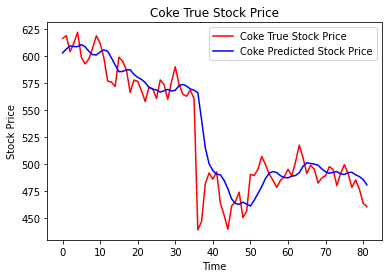

In [75]:
plot_predictions(test_set,GRU_predicted_stock_price)

### MSE and RMSE

In [77]:
mse = mean_squared_error(test_set,GRU_predicted_stock_price)
rmse = np.sqrt(mse)
print(rmse)

22.44294073592909


# 4.Findings 
## 4.1 ARIMA Model
We can see that the ARIMA model predicts poorly. It differs significantly from the real value because Coke's stock price is expected to fall in 2022. However, the data we forecasted is increasing.

We consider some possible causes for such issue:

1. The ARIMA model cannot predict long-term data.  Only a few days or months can be predicted by the model. A long-term forecast would result in a straight line, similar to the one seen above.

2. The ARIMA model can only capture the data's linear relationship, ignoring the non-linear aspects. As a result, we must include the GARCH model or other models if we wish to include the nonlinear component. However, the data we used in this project is not too volatile, so we did not consider introducing the GARCH model.

3. ARIMA is difficult to predict the turning point. As shown in the previous figure, the prediction result is shown as a straight line. Although the prediction result fluctuates, the extent is too small to predict accurately.

4. The Covid-19 has a major impact on the stock market. So  it is difficult to predict during this time.

## 4.2 LSTM Model 
Firstly, we divided the dataset into two parts: one is the training set(before 2022)and the other one (after 2022) is the test set. Deep learning models (such as LSTM) need to be trained with a large amount of data, otherwise it is likely to have overfitting problem. Our training set contains the daily trading data of Coke stock in the past 19 years, so the amount of data is sufficient, which can help to improve the generalization ability of the model.

Secondly, we constructed the LSTM model and used it to predict the opening price of 2022. It is straightforward to compared it with the real opening price data (test set). The result shows that the RMSE is 23.30, and the predicted price is very close to the real price.For example, the estimated stock price on 29th, April is about 457 dollars and the actual price of that day is 448 dollars. Besides, they also has the same fluctuation trend. 

Therefore, we can conclude that our LSTM model has good prediction accuracy and is suitable for stock price prediction.

## 4.3 GRU Model
GRU model is similar as the LSTM model, but the former is more concise. We also needed to use the sequential function to construct the layers and then tested the fitness of the GRU model. At last, we used the test_set to predict the stock price. As the prediction graph shows that, the RMSE of GRU model is 22.44 and slightly lower than the LSTM. To sum up, GRU is a better model to predict the stock price of Coke because of lower RMSE.

# 5. Conclusion
From the output of the three models we can conclude that ARIMA(RMSE:118.82) is the worst one while the prediction ability of LSTM(RMSE:23.30) and GRU(22.44) are basically at the same level(GRU is slightly better than LSTM in this model). In other words, both GRU and LSTM are suitable for stock price prediction.

Our time series based models also have some limitations, that is, they do not take into account the influence of external factors (such as covid-19). This also leads to a large deviation between the predicted value and the real value at some time.In further research, if we combine the time series and external factors, we may obtain a more trust-worthy prediction model.